<a href="https://colab.research.google.com/github/pattanps/ppm2-ML-AI-course/blob/main/ppm2ml_finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervisor Learning
## 1. Import data [นำข้อมูลเข้า]
## 2. Preprocessing data, data wrangling [จัดการสิ่งรบกวน].
## 3. Choose a mathematical model [Classification: Random forest]
## 4. Train, Learning [ร่ำเรียน, ฝึกฝน]
## 5. Evaluation [วิเคราะห์]
## 6. Decision [ตัดสินใจ]


In [ ]:
#install important libraries

# Pandas
# yfinance
! pip install yfinance 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import yfinance as yf
ethusd = yf.Ticker("ETH-USD")
fdata = ethusd.history(period="max")

fdata.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-11-09 00:00:00+00:00,308.644989,329.451996,307.056000,320.884003,893249984,0,0
2017-11-10 00:00:00+00:00,320.670990,324.717987,294.541992,299.252991,885985984,0,0
2017-11-11 00:00:00+00:00,298.585999,319.453003,298.191986,314.681000,842300992,0,0
2017-11-12 00:00:00+00:00,314.690002,319.153015,298.513000,307.907990,1613479936,0,0
2017-11-13 00:00:00+00:00,307.024994,328.415009,307.024994,316.716003,1041889984,0,0


In [ ]:
# เพิ่มแถวข้อมูล
# 1. moving average period 20
# 2. moving average period 100
# 3. Standard variation

# 1. moving average period 20
fdata["MovingAverage 20"]= fdata['Close'].rolling(20).mean()
fdata["MovingAverage 100"]= fdata['Close'].rolling(100).mean()

# หาขนาด ความผันผวน Volatility 

In [ ]:
fdata

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MovingAverage 20,MovingAverage 100
Date,,,,,,,,,
2017-11-09 00:00:00+00:00,308.644989,329.451996,307.056000,320.884003,893249984,0,0,NaN,NaN
2017-11-10 00:00:00+00:00,320.670990,324.717987,294.541992,299.252991,885985984,0,0,NaN,NaN
2017-11-11 00:00:00+00:00,298.585999,319.453003,298.191986,314.681000,842300992,0,0,NaN,NaN
2017-11-12 00:00:00+00:00,314.690002,319.153015,298.513000,307.907990,1613479936,0,0,NaN,NaN
2017-11-13 00:00:00+00:00,307.024994,328.415009,307.024994,316.716003,1041889984,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-12-03 00:00:00+00:00,1294.456543,1299.840332,1241.431885,1243.334839,5672609405,0,0,1210.509674,1387.350719
2022-12-04 00:00:00+00:00,1243.219238,1281.492310,1242.911743,1280.256592,5174128454,0,0,1212.442291,1385.075457
2022-12-05 00:00:00+00:00,1279.998901,1302.237549,1252.472412,1259.676758,6120359523,0,0,1212.839319,1382.758274


In [ ]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 71 kB 3.6 MB/s 


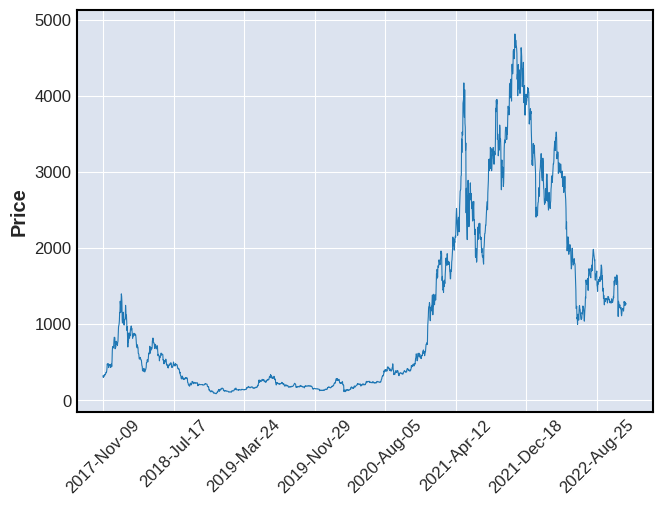

In [ ]:
import mplfinance as mpf
mpf.plot(fdata,type='line')